In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [18]:
os.listdir('../../Datasets/images/')

['elon musk', 'maria sharapova', 'messi', 'ronaldo', 'virat']

In [20]:

image_dict = {}

path = '../../Datasets/images/'
for folder in os.listdir(path):
    image_dict[folder] = []
    for img_path in os.listdir(path+folder):
        image_dict[folder].append(path+folder+'/'+img_path)

In [21]:
image_dict.keys()

dict_keys(['elon musk', 'maria sharapova', 'messi', 'ronaldo', 'virat'])

In [22]:
image_l = [folder for folder in image_dict.keys()]
image_l

['elon musk', 'maria sharapova', 'messi', 'ronaldo', 'virat']

In [23]:
image_label = {image_l[i]:i for i in range(5)}
image_label

{'elon musk': 0, 'maria sharapova': 1, 'messi': 2, 'ronaldo': 3, 'virat': 4}

In [24]:
X = []
y = []
IMG_SHAPE = (224,224)

for label in image_dict:
    class_label = image_label[label]
    for img_path in image_dict[label]:
        img = cv2.imread(img_path)
        resize_img = cv2.resize(img,IMG_SHAPE)
        X.append(resize_img)
        y.append(class_label)

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
# Shuffle and split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
len(X_train), len(X_test)

(279, 70)

In [28]:
X_train = X_train/255
X_test = X_test/255

In [29]:
X_train[0].shape

(224, 224, 3)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

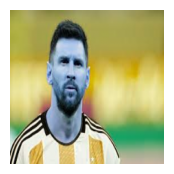

In [30]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])
plt.axis("off")

In [31]:
import tensorflow_hub as hub

c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [32]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers

# Define constants
IMG_SHAPE = (224, 224)
NUM_CLASSES = 5

# ✅ Feature extractor URL
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# ✅ Define the Hub layer
hub_layer = hub.KerasLayer(
    feature_extractor_url,
    input_shape=IMG_SHAPE + (3,),
    trainable=False
)

# ✅ Wrap it in a Lambda layer to avoid KerasTensor issues
def feature_extractor(x):
    return hub_layer(x)

# ✅ Build model with Functional API
inputs = keras.Input(shape=IMG_SHAPE + (3,))
x = layers.Lambda(feature_extractor)(inputs)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# ✅ Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.2709 - loss: 1.7417
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.5109 - loss: 1.2482
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.6568 - loss: 0.9643
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.7363 - loss: 0.7865
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.7858 - loss: 0.6467


In [42]:
model.evaluate(X_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.7945 - loss: 0.6735


[0.6736049056053162, 0.800000011920929]

In [43]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step


In [44]:
np.argmax(y_pred[4]), y_test[:5]

(np.int64(3), array([3, 4, 3, 0, 3]))

In [45]:
IMAGE_SHAPE = (224,224)
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [46]:
import PIL
img = PIL.Image.open("messi.jpg").convert("RGB").resize(IMAGE_SHAPE)

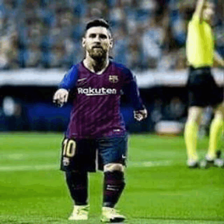

In [47]:
img

In [48]:
img = np.array(img)/255
img

array([[[0.36862745, 0.45098039, 0.54117647],
        [0.36078431, 0.41568627, 0.50588235],
        [0.3372549 , 0.4       , 0.4627451 ],
        ...,
        [0.20392157, 0.20784314, 0.15294118],
        [0.19215686, 0.20392157, 0.14901961],
        [0.19215686, 0.20392157, 0.14901961]],

       [[0.36078431, 0.45490196, 0.53333333],
        [0.35686275, 0.41960784, 0.49411765],
        [0.33333333, 0.39215686, 0.45882353],
        ...,
        [0.19607843, 0.20784314, 0.15294118],
        [0.19215686, 0.20392157, 0.14901961],
        [0.19215686, 0.20392157, 0.14901961]],

       [[0.35686275, 0.45882353, 0.5254902 ],
        [0.34509804, 0.43529412, 0.48235294],
        [0.32156863, 0.38039216, 0.45490196],
        ...,
        [0.18823529, 0.2       , 0.14509804],
        [0.19215686, 0.20392157, 0.14901961],
        [0.19215686, 0.20392157, 0.14901961]],

       ...,

       [[0.47843137, 0.61960784, 0.23529412],
        [0.42352941, 0.56862745, 0.2       ],
        [0.39215686, 0

In [49]:
img.shape

(224, 224, 3)

In [50]:
img[np.newaxis,...].shape

(1, 224, 224, 3)

In [51]:
number_to_name = {v:k for k,v in image_label.items()}
number_to_name

{0: 'elon musk', 1: 'maria sharapova', 2: 'messi', 3: 'ronaldo', 4: 'virat'}

In [52]:
prediction = model.predict([img[np.newaxis,...]])
print(np.argmax(prediction))

c:\Users\nabee\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 224, 224, 3))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1


In [53]:
number_to_name[np.argmax(prediction)]

'maria sharapova'

In [54]:
def predict_image(image_path):
    img = PIL.Image.open(image_path).convert("RGB").resize(IMAGE_SHAPE)
    img = np.array(img)/255
    prediction = model.predict([img[np.newaxis,...]])
    return number_to_name[np.argmax(prediction)]


In [55]:
predict_image("maria.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


'maria sharapova'

In [59]:
model.save('image_classification_model.keras')

In [62]:
from tensorflow.keras.models import load_model
loaded_model = load_model('image_classification_model.h5', custom_objects={
    'KerasLayer': hub.KerasLayer,
    'feature_extractor': feature_extractor
})

In [ ]:
loaded_model.evaluate(X_test,y_test)

AttributeError: 'function' object has no attribute 'evaluate'